In [3]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install scikit-learn

### For this product we are looking at 311 call data. Non-emergency service calls to the government.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('https://opendata.arcgis.com/datasets/98b7406def094fa59838f14beb1b8c81_10.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (12,14,16,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,...,XCOORD,YCOORD,LATITUDE,LONGITUDE,CITY,STATE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS
0,-77.061056,38.942287,281741,SIGNMISS,Roadway Signs,Toa-Trans Sys Mnt-Signs,DDOT,1,2019-01-02T05:07:24.000Z,2019-09-11T09:30:52.000Z,...,394707.12,141600.39,38.942279,-77.061054,WASHINGTON,DC,20008.0,219404.0,3.0,NaN
1,-76.971925,38.852085,281742,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,1,2019-01-02T16:55:32.000Z,2019-01-08T12:00:59.000Z,...,402437.18,131585.90,38.852078,-76.971923,WASHINGTON,DC,20020.0,47719.0,8.0,fe - Collected – Close SR
2,-77.004528,38.962182,281743,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,1,2019-01-02T16:55:34.000Z,2019-01-10T09:30:39.000Z,...,399607.80,143807.17,38.962174,-77.004525,WASHINGTON,DC,20011.0,52153.0,4.0,r.m - Collected – Close SR
3,-77.079985,38.922365,281744,S0181,Illegal Dumping,SWMA- Solid Waste Management Admistration,DPW,1,2019-01-02T16:56:19.000Z,2019-01-04T10:23:25.000Z,...,393064.13,139390.12,38.922357,-77.079983,WASHINGTON,DC,20007.0,270813.0,3.0,The bulk items have been removed.
4,-77.078529,38.919732,281745,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,1,2019-01-02T16:56:55.000Z,2019-01-07T15:11:42.000Z,...,393190.19,139097.76,38.919724,-77.078527,WASHINGTON,DC,20007.0,263445.0,3.0,js - Private Collection – Close SR


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365002 entries, 0 to 365001
Data columns (total 30 columns):
X                             365002 non-null float64
Y                             365002 non-null float64
OBJECTID                      365002 non-null int64
SERVICECODE                   365002 non-null object
SERVICECODEDESCRIPTION        365002 non-null object
SERVICETYPECODEDESCRIPTION    364646 non-null object
ORGANIZATIONACRONYM           364799 non-null object
SERVICECALLCOUNT              365002 non-null int64
ADDDATE                       365002 non-null object
RESOLUTIONDATE                343619 non-null object
SERVICEDUEDATE                364237 non-null object
SERVICEORDERDATE              365002 non-null object
INSPECTIONFLAG                307053 non-null object
INSPECTIONDATE                168914 non-null object
INSPECTORNAME                 1 non-null object
SERVICEORDERSTATUS            364967 non-null object
STATUS_CODE                   151884 non-null 

In [5]:
# Note that the dates came in as string values
date_cols = ['ADDDATE','RESOLUTIONDATE','SERVICEDUEDATE','SERVICEORDERDATE','INSPECTIONDATE']
date_cols

['ADDDATE',
 'RESOLUTIONDATE',
 'SERVICEDUEDATE',
 'SERVICEORDERDATE',
 'INSPECTIONDATE']

In [6]:
data[date_cols] = data[date_cols].apply(pd.to_datetime)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365002 entries, 0 to 365001
Data columns (total 30 columns):
X                             365002 non-null float64
Y                             365002 non-null float64
OBJECTID                      365002 non-null int64
SERVICECODE                   365002 non-null object
SERVICECODEDESCRIPTION        365002 non-null object
SERVICETYPECODEDESCRIPTION    364646 non-null object
ORGANIZATIONACRONYM           364799 non-null object
SERVICECALLCOUNT              365002 non-null int64
ADDDATE                       365002 non-null datetime64[ns, UTC]
RESOLUTIONDATE                343619 non-null datetime64[ns, UTC]
SERVICEDUEDATE                364237 non-null datetime64[ns, UTC]
SERVICEORDERDATE              365002 non-null datetime64[ns, UTC]
INSPECTIONFLAG                307053 non-null object
INSPECTIONDATE                168914 non-null datetime64[ns, UTC]
INSPECTORNAME                 1 non-null object
SERVICEORDERSTATUS            3649

In [8]:
data.SERVICECODEDESCRIPTION.value_counts().head(20)

Bulk Collection                           55753
Parking Enforcement                       46324
Parking Meter Repair                      31728
Emergency No-Parking Verification         19776
Pothole                                   14112
Trash Collection - Missed                 13864
Roadway Signs                             13210
Illegal Dumping                           12336
Residential Parking Permit Violation      12279
Sanitation Enforcement                    10621
Streetlight Repair Investigation          10522
Abandoned Vehicle - On Public Property     7730
Rodent Inspection and Treatment            6598
Tree Inspection                            6519
DC Government Information                  6419
Recycling Collection - Missed              5191
Graffiti Removal                           5111
Out of State Parking Violation (ROSA)      5010
Sidewalk Repair                            4874
Alley Cleaning                             4723
Name: SERVICECODEDESCRIPTION, dtype: int

In [9]:
data.SERVICECODEDESCRIPTION.value_counts().head(20)

Bulk Collection                           55753
Parking Enforcement                       46324
Parking Meter Repair                      31728
Emergency No-Parking Verification         19776
Pothole                                   14112
Trash Collection - Missed                 13864
Roadway Signs                             13210
Illegal Dumping                           12336
Residential Parking Permit Violation      12279
Sanitation Enforcement                    10621
Streetlight Repair Investigation          10522
Abandoned Vehicle - On Public Property     7730
Rodent Inspection and Treatment            6598
Tree Inspection                            6519
DC Government Information                  6419
Recycling Collection - Missed              5191
Graffiti Removal                           5111
Out of State Parking Violation (ROSA)      5010
Sidewalk Repair                            4874
Alley Cleaning                             4723
Name: SERVICECODEDESCRIPTION, dtype: int

In [10]:
# Filter dataset 

In [11]:
oos = data[data.SERVICECODEDESCRIPTION == 'Out of State Parking Violation (ROSA)']

In [12]:
oos.head()

,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,...,XCOORD,YCOORD,LATITUDE,LONGITUDE,CITY,STATE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS
13,-77.038667,38.939761,281754,S0336,Out of State Parking Violation (ROSA),PEMA- Parking Enforcement Management Administr...,DPW,1,2019-01-02 17:51:03+00:00,2019-01-03 03:13:51+00:00,...,396647.97,141319.00,38.939754,-77.038664,NaN,NaN,20011.0,NaN,4.0,NaN
45,-77.019796,38.933226,281786,S0336,Out of State Parking Violation (ROSA),PEMA- Parking Enforcement Management Administr...,DPW,1,2019-01-11 10:04:18+00:00,2019-01-15 05:04:00+00:00,...,398283.83,140592.96,38.933218,-77.019794,WASHINGTON,DC,20010.0,228752.0,1.0,NaN
54,-76.982326,38.919322,281795,S0336,Out of State Parking Violation (ROSA),PEMA- Parking Enforcement Management Administr...,DPW,1,2019-01-03 17:24:48+00:00,2019-01-04 04:08:54+00:00,...,401532.93,139049.46,38.919314,-76.982323,WASHINGTON,DC,20018.0,50744.0,5.0,NaN
100,-76.981622,38.896828,281841,S0336,Out of State Parking Violation (ROSA),PEMA- Parking Enforcement Management Administr...,DPW,1,2019-01-02 23:30:29+00:00,2019-01-03 04:48:27+00:00,...,401594.49,136552.51,38.896821,-76.981619,WASHINGTON,DC,20002.0,59594.0,6.0,NaN
136,-77.031446,38.949190,281877,S0336,Out of State Parking Violation (ROSA),PEMA- Parking Enforcement Management Administr...,DPW,1,2019-01-01 19:43:27+00:00,2019-01-03 03:22:40+00:00,...,397274.31,142365.42,38.949183,-77.031444,WASHINGTON,DC,20011.0,255122.0,4.0,NaN


In [13]:
oos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5010 entries, 13 to 364954
Data columns (total 30 columns):
X                             5010 non-null float64
Y                             5010 non-null float64
OBJECTID                      5010 non-null int64
SERVICECODE                   5010 non-null object
SERVICECODEDESCRIPTION        5010 non-null object
SERVICETYPECODEDESCRIPTION    5010 non-null object
ORGANIZATIONACRONYM           5010 non-null object
SERVICECALLCOUNT              5010 non-null int64
ADDDATE                       5010 non-null datetime64[ns, UTC]
RESOLUTIONDATE                5004 non-null datetime64[ns, UTC]
SERVICEDUEDATE                5010 non-null datetime64[ns, UTC]
SERVICEORDERDATE              5010 non-null datetime64[ns, UTC]
INSPECTIONFLAG                3265 non-null object
INSPECTIONDATE                1321 non-null datetime64[ns, UTC]
INSPECTORNAME                 0 non-null object
SERVICEORDERSTATUS            5010 non-null object
STATUS_CODE 

In [14]:
oos.STATUS_CODE.value_counts()

CLOSED    1938
OPEN         6
Name: STATUS_CODE, dtype: int64

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:420: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  numeric_data[col] = np.asarray(numeric_data[col])


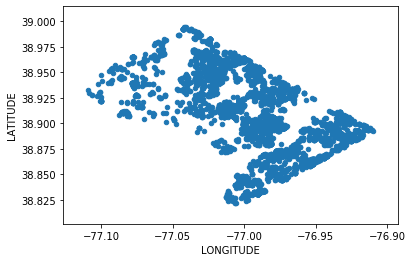

In [16]:
oos.plot(x='LONGITUDE', y= 'LATITUDE', kind='scatter')

In [17]:
import seaborn as sns
sns.set(rc={'figure.figsize': (14,8)})

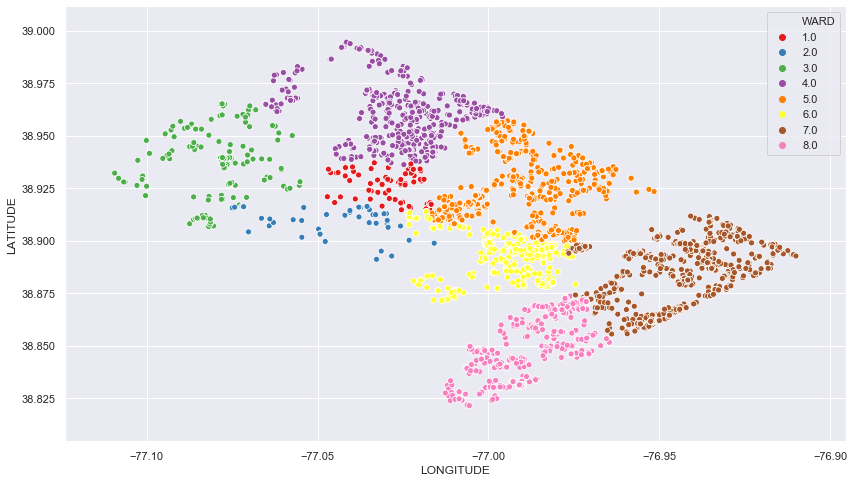

In [18]:
sns.scatterplot(x='LONGITUDE',y='LATITUDE',
               hue='WARD', data=oos, palette=sns.color_palette("Set1",8))

In [19]:
oos.ADDDATE.dt.hour.value_counts().sort_index()

0     148
1     101
2      83
3      49
4      65
5      83
6     107
7     178
8     212
9     288
10    246
11    258
12    213
13    225
14    229
15    240
16    272
17    283
18    246
19    262
20    266
21    327
22    368
23    261
Name: ADDDATE, dtype: int64

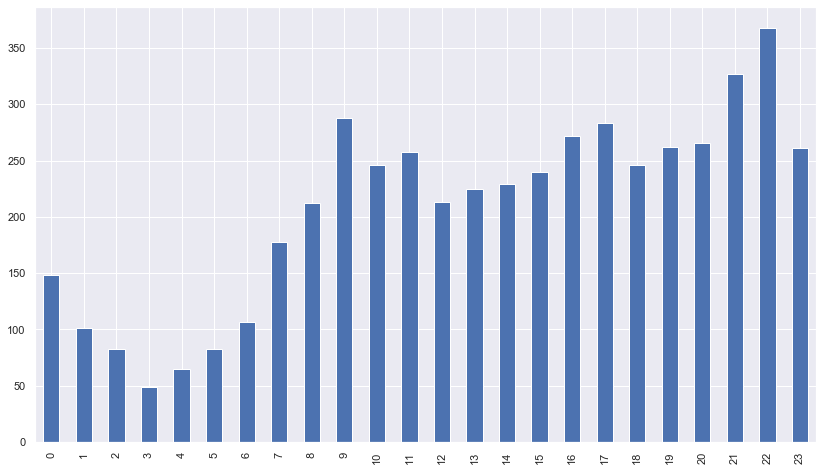

In [20]:
oos.ADDDATE.dt.hour.value_counts().sort_index().plot.bar()

In [21]:
def plot_value_counts(ser):
    ser.value_counts().sort_index().plot.bar()

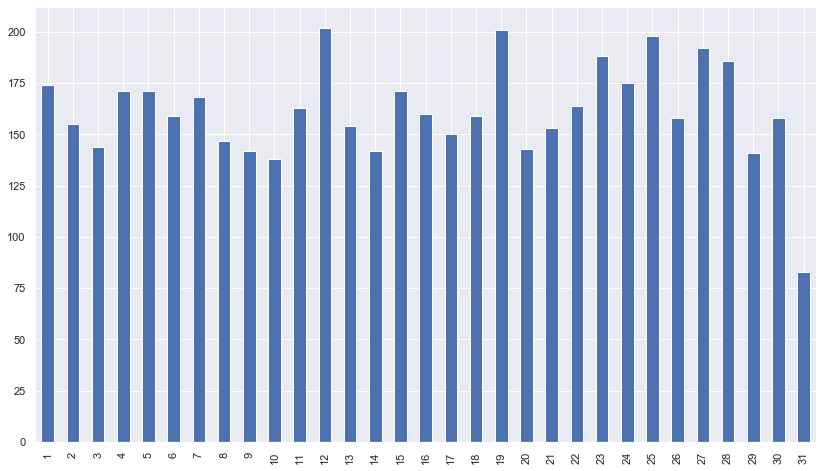

In [22]:
plot_value_counts(oos.ADDDATE.dt.day)

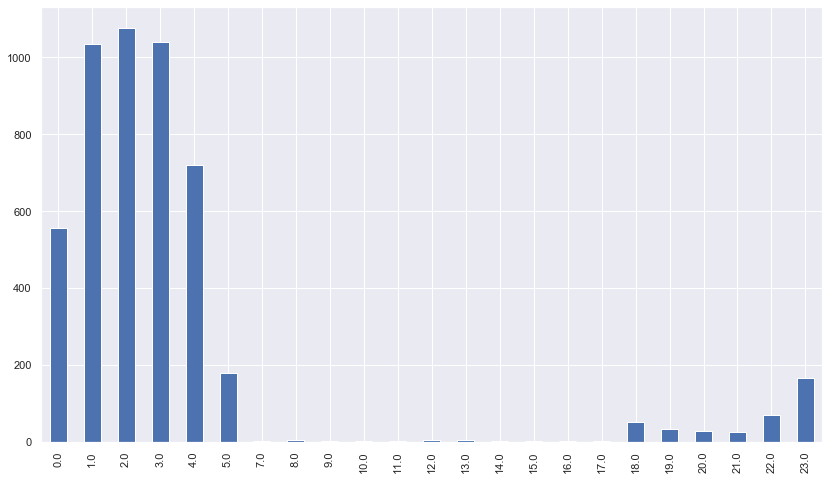

In [23]:
plot_value_counts(oos.RESOLUTIONDATE.dt.hour)

In [24]:
gr = data[data.SERVICECODEDESCRIPTION == 'Graffiti Removal']
gr

,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,...,XCOORD,YCOORD,LATITUDE,LONGITUDE,CITY,STATE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS
245,-77.067321,38.906587,281986,GRAFF,Graffiti Removal,SWMA- Solid Waste Management Admistration,DPW,1,2019-01-17 14:40:10+00:00,2019-04-10 13:00:34+00:00,...,394161.020000,137637.830000,38.906580,-77.067319,WASHINGTON,DC,20007.0,275395.0,2.0,Location completed by J.Tramun and G.Lynn.
319,-77.061201,38.906010,282060,GRAFF,Graffiti Removal,SWMA- Solid Waste Management Admistration,DPW,1,2019-01-14 18:08:45+00:00,2019-06-07 20:30:24+00:00,...,394691.850000,137573.360000,38.906002,-77.061199,WASHINGTON,DC,20007.0,804634.0,2.0,Location completed by C.Hamilton and C.Bennett.
428,-77.067815,38.906773,282169,GRAFF,Graffiti Removal,SWMA- Solid Waste Management Admistration,DPW,1,2019-01-17 15:03:03+00:00,2019-06-05 19:30:14+00:00,...,394118.260057,137658.520029,38.906766,-77.067812,NaN,NaN,20007.0,902188.0,2.0,Location has been completed by C.Hamilton and ...
677,-77.038842,38.932540,282418,GRAFF,Graffiti Removal,SWMA- Solid Waste Management Admistration,DPW,1,2019-01-02 14:30:39+00:00,2019-05-17 09:10:46+00:00,...,396632.453595,140517.316128,38.932532,-77.038839,NaN,NaN,20010.0,900072.0,1.0,Location completed by J.Truman and B.Green.
751,-76.989491,38.864983,282492,GRAFF,Graffiti Removal,SWMA- Solid Waste Management Admistration,DPW,1,2019-01-09 15:49:28+00:00,2019-01-25 06:30:28+00:00,...,400912.270000,133017.360000,38.864976,-76.989488,WASHINGTON,DC,20020.0,278069.0,8.0,Location completed by J.Tramun and J.Raynor.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364180,-77.081126,38.951214,720679,GRAFF,Graffiti Removal,SWMA- Solid Waste Management Admistration,DPW,1,2019-12-30 20:31:58+00:00,2020-01-28 13:47:05+00:00,...,392968.050000,142592.710000,38.951206,-77.081124,WASHINGTON,DC,20016.0,264448.0,3.0,NaN
364500,-77.011971,38.911894,720999,GRAFF,Graffiti Removal,SWMA- Solid Waste Management Admistration,DPW,1,2019-12-31 10:16:38+00:00,2020-02-11 16:49:34+00:00,...,398961.920000,138224.880000,38.911887,-77.011969,WASHINGTON,DC,20001.0,218381.0,5.0,NaN
364696,-76.998070,38.905811,721435,GRAFF,Graffiti Removal,SWMA- Solid Waste Management Admistration,DPW,1,2019-12-31 12:29:53+00:00,2020-02-21 13:11:49+00:00,...,400167.620000,137549.550000,38.905804,-76.998067,WASHINGTON,DC,20002.0,5260.0,6.0,NaN
364854,-77.023556,38.933379,721593,GRAFF,Graffiti Removal,SWMA- Solid Waste Management Admistration,DPW,1,2019-12-31 14:50:43+00:00,2020-03-09 11:02:02+00:00,...,397957.820000,140610.000000,38.933371,-77.023554,WASHINGTON,DC,20010.0,228782.0,1.0,NaN


In [25]:
gr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5111 entries, 245 to 364903
Data columns (total 30 columns):
X                             5111 non-null float64
Y                             5111 non-null float64
OBJECTID                      5111 non-null int64
SERVICECODE                   5111 non-null object
SERVICECODEDESCRIPTION        5111 non-null object
SERVICETYPECODEDESCRIPTION    5111 non-null object
ORGANIZATIONACRONYM           5111 non-null object
SERVICECALLCOUNT              5111 non-null int64
ADDDATE                       5111 non-null datetime64[ns, UTC]
RESOLUTIONDATE                4908 non-null datetime64[ns, UTC]
SERVICEDUEDATE                5111 non-null datetime64[ns, UTC]
SERVICEORDERDATE              5111 non-null datetime64[ns, UTC]
INSPECTIONFLAG                4679 non-null object
INSPECTIONDATE                2353 non-null datetime64[ns, UTC]
INSPECTORNAME                 0 non-null object
SERVICEORDERSTATUS            5111 non-null object
STATUS_CODE

In [26]:
gr.STATUS_CODE.value_counts()

CLOSED    2214
OPEN       112
Name: STATUS_CODE, dtype: int64

In [27]:
gr.WARD.value_counts()

1.0    1889
2.0     937
4.0     630
6.0     498
5.0     413
3.0     407
7.0     120
8.0      68
Name: WARD, dtype: int64

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:420: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  numeric_data[col] = np.asarray(numeric_data[col])
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


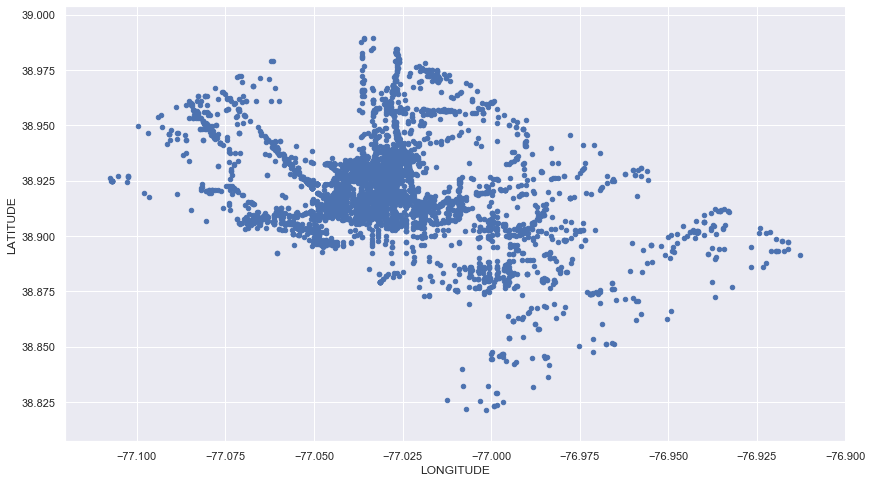

In [28]:
gr.plot(x='LONGITUDE',y= 'LATITUDE', kind= 'scatter')

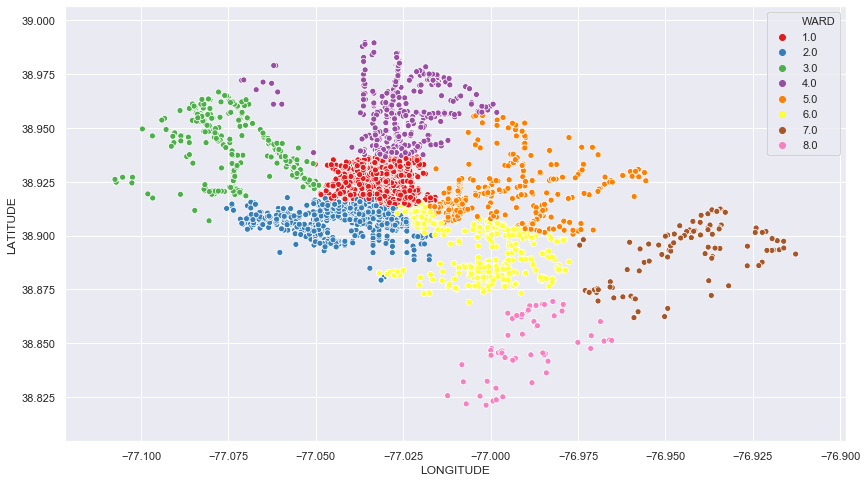

In [29]:
sns.scatterplot(x='LONGITUDE',y='LATITUDE', 
                hue='WARD', data=gr,
               palette=sns.color_palette("Set1",8))

In [30]:
#When is graffiti being reported

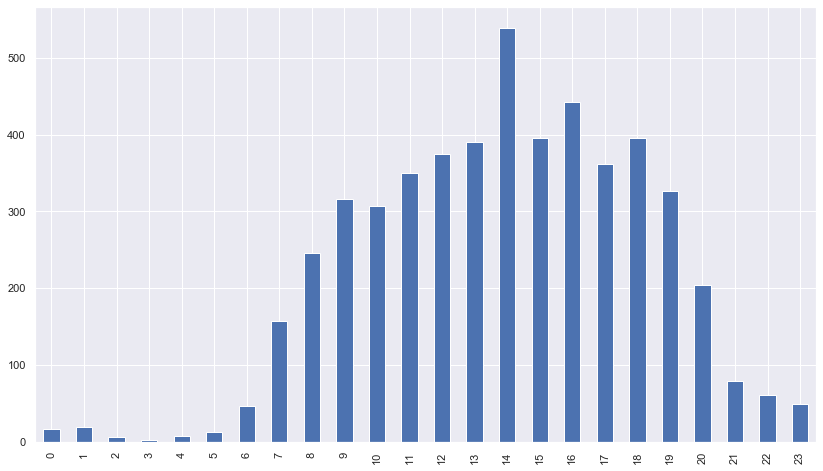

In [31]:
plot_value_counts(gr.ADDDATE.dt.hour)

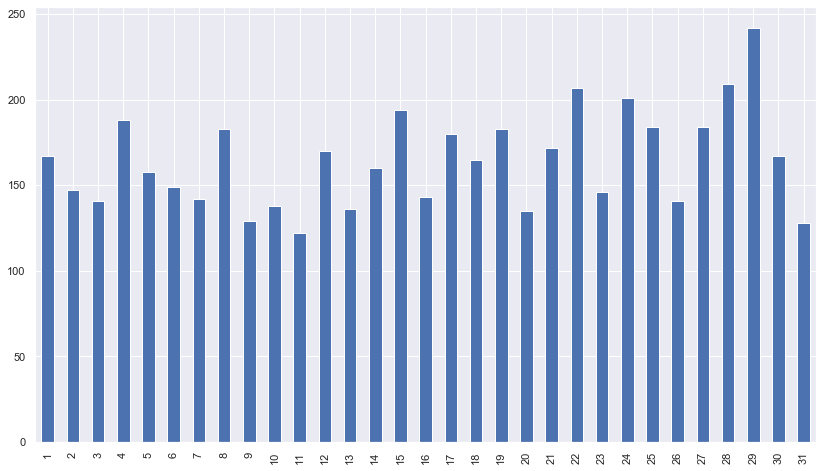

In [32]:
plot_value_counts(gr.ADDDATE.dt.day)

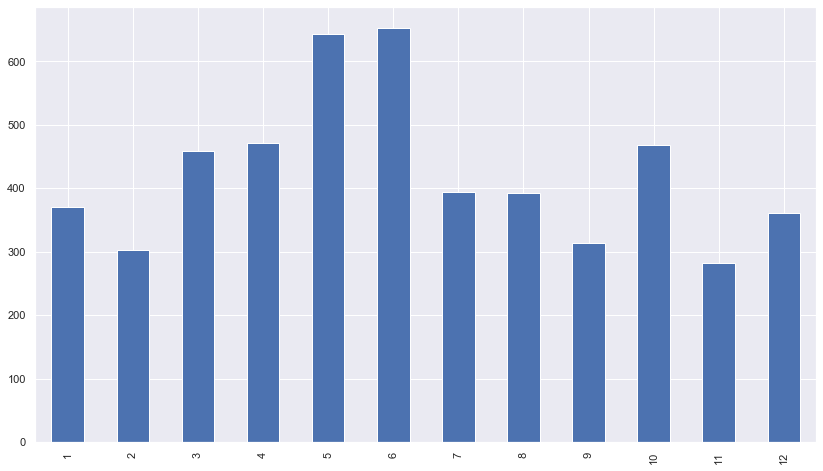

In [33]:
plot_value_counts(gr.ADDDATE.dt.month)

In [34]:
data.SERVICECODEDESCRIPTION.value_counts().head(20)

Bulk Collection                           55753
Parking Enforcement                       46324
Parking Meter Repair                      31728
Emergency No-Parking Verification         19776
Pothole                                   14112
Trash Collection - Missed                 13864
Roadway Signs                             13210
Illegal Dumping                           12336
Residential Parking Permit Violation      12279
Sanitation Enforcement                    10621
Streetlight Repair Investigation          10522
Abandoned Vehicle - On Public Property     7730
Rodent Inspection and Treatment            6598
Tree Inspection                            6519
DC Government Information                  6419
Recycling Collection - Missed              5191
Graffiti Removal                           5111
Out of State Parking Violation (ROSA)      5010
Sidewalk Repair                            4874
Alley Cleaning                             4723
Name: SERVICECODEDESCRIPTION, dtype: int

In [35]:
rodent = data[data.SERVICECODEDESCRIPTION == 'Rodent Inspection and Treatment']
rodent.head(20)

,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,...,XCOORD,YCOORD,LATITUDE,LONGITUDE,CITY,STATE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS
81,-76.997030,38.896608,281822,S0311,Rodent Inspection and Treatment,DOH- Department Of Health,DOH,1,2019-01-02 11:37:49+00:00,2019-01-08 15:12:35+00:00,...,400257.860000,136527.880000,38.896600,-76.997027,WASHINGTON,DC,20002.0,151660.0,6.0,On 1/7/19 D Broomfield found no rat burrows se...
237,-77.034809,38.917609,281978,S0311,Rodent Inspection and Treatment,DOH- Department Of Health,DOH,1,2019-01-15 12:08:29+00:00,2019-01-17 06:52:21+00:00,...,396981.510000,138859.780000,38.917602,-77.034806,WASHINGTON,DC,20009.0,242045.0,1.0,On 1-16-19 Rodent Enforcement Task force inspe...
434,-77.038475,38.917572,282175,S0311,Rodent Inspection and Treatment,DOH- Department Of Health,DOH,1,2019-01-17 16:48:24+00:00,2019-01-22 07:16:14+00:00,...,396663.519995,138855.830014,38.917565,-77.038473,NaN,NaN,20009.0,906582.0,1.0,On 1-18-19 Inspector Jacobs inspected and trea...
548,-77.019868,38.928373,282289,S0311,Rodent Inspection and Treatment,DOH- Department Of Health,DOH,1,2019-01-07 22:45:18+00:00,2019-01-08 07:23:56+00:00,...,398277.470000,140054.260000,38.928366,-77.019866,WASHINGTON,DC,20001.0,229452.0,1.0,Alley and back was treated on 1-3-19 by Inspec...
590,-76.985240,38.909465,282331,S0311,Rodent Inspection and Treatment,DOH- Department Of Health,DOH,1,2019-01-11 11:05:49+00:00,2019-01-22 14:59:53+00:00,...,401280.350000,137955.190000,38.909457,-76.985238,WASHINGTON,DC,20002.0,57208.0,5.0,On 1/22/19 @12:40pm C.Redman found 5 rat burro...
602,-77.012661,38.915569,282343,S0311,Rodent Inspection and Treatment,DOH- Department Of Health,DOH,1,2019-01-15 23:25:20+00:00,2019-01-22 14:54:55+00:00,...,398902.170269,138632.804958,38.915562,-77.012659,NaN,NaN,20001.0,NaN,5.0,On 1/22/19 C.Redman found no rat burrows on th...
665,-77.033585,38.936320,282406,S0311,Rodent Inspection and Treatment,DOH- Department Of Health,DOH,1,2019-01-02 12:00:10+00:00,2019-01-04 07:10:12+00:00,...,397088.360000,140936.800000,38.936313,-77.033583,WASHINGTON,DC,20010.0,234733.0,1.0,On 1-3-19 Inspector Jacobs inspected and treat...
668,-77.033654,38.936334,282409,S0311,Rodent Inspection and Treatment,DOH- Department Of Health,DOH,1,2019-01-02 12:03:14+00:00,2019-01-04 07:09:30+00:00,...,397082.400000,140938.320000,38.936326,-77.033652,WASHINGTON,DC,20010.0,234732.0,1.0,On 1-3-19 Inspector Jacobs inspected and treat...
678,-77.027247,38.930938,282419,S0311,Rodent Inspection and Treatment,DOH- Department Of Health,DOH,1,2019-01-02 13:31:09+00:00,2019-01-04 07:05:59+00:00,...,397637.700000,140339.160000,38.930931,-77.027245,WASHINGTON,DC,20010.0,230977.0,1.0,On 1-3-19 Inspector Jacobs inspected and treat...
849,-77.021577,38.945627,282590,S0311,Rodent Inspection and Treatment,DOH- Department Of Health,DOH,1,2019-01-09 16:54:51+00:00,2019-01-18 09:16:09+00:00,...,398129.710000,141969.650000,38.945620,-77.021575,WASHINGTON,DC,20011.0,247386.0,4.0,on 1-17-19 @ 10:34 a.m. inspector M.Parker bai...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


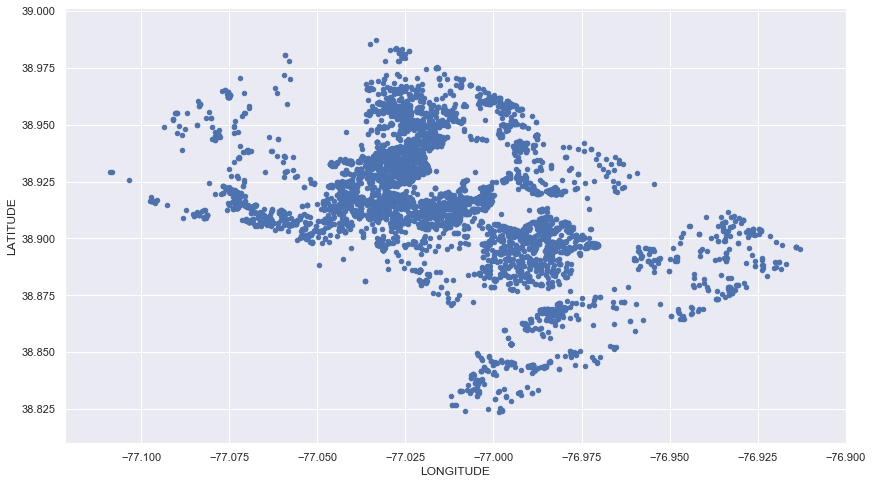

In [36]:
rodent.plot(x='LONGITUDE',y= 'LATITUDE', kind= 'scatter')

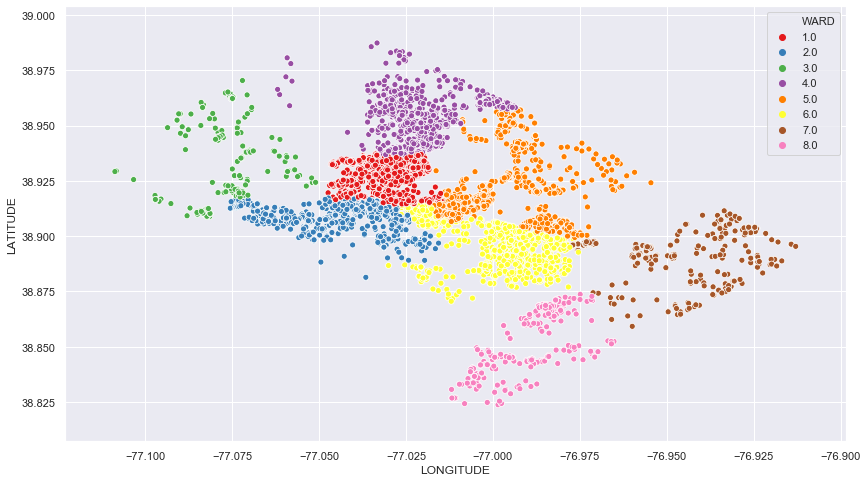

In [37]:
sns.scatterplot(x='LONGITUDE',y='LATITUDE', 
                hue='WARD', data=rodent,
               palette=sns.color_palette("Set1",8))

In [38]:
bulk_df = data[data.SERVICECODEDESCRIPTION == 'Bulk Collection']
bulk_df = bulk_df[['SERVICECALLCOUNT','ADDDATE']].set_index('ADDDATE')
bulk_df

,SERVICECALLCOUNT
ADDDATE,
2019-01-02 16:55:32+00:00,1
2019-01-02 16:55:34+00:00,1
2019-01-02 16:56:55+00:00,1
2019-01-02 16:58:42+00:00,1
2019-01-02 17:10:51+00:00,1
...,...
2019-12-31 13:27:20+00:00,1
2019-12-31 13:49:19+00:00,1
2019-12-31 13:53:22+00:00,1


In [39]:
grouped_df = bulk_df.resample('1w').sum()

In [40]:
grouped_df.head()

,SERVICECALLCOUNT
ADDDATE,
2019-01-06 00:00:00+00:00,857
2019-01-13 00:00:00+00:00,978
2019-01-20 00:00:00+00:00,671
2019-01-27 00:00:00+00:00,923
2019-02-03 00:00:00+00:00,795


In [41]:
grouped_df = grouped_df.reset_index()
grouped_df = grouped_df.reset_index()
grouped_df

,index,ADDDATE,SERVICECALLCOUNT
0,0,2019-01-06 00:00:00+00:00,857
1,1,2019-01-13 00:00:00+00:00,978
2,2,2019-01-20 00:00:00+00:00,671
3,3,2019-01-27 00:00:00+00:00,923
4,4,2019-02-03 00:00:00+00:00,795
5,5,2019-02-10 00:00:00+00:00,918
6,6,2019-02-17 00:00:00+00:00,814
7,7,2019-02-24 00:00:00+00:00,782
8,8,2019-03-03 00:00:00+00:00,972
9,9,2019-03-10 00:00:00+00:00,918


In [42]:
grouped_df.columns = ['Week Number','Date', 'Call Count']

In [43]:
grouped_df.head()

,Week Number,Date,Call Count
0,0,2019-01-06 00:00:00+00:00,857
1,1,2019-01-13 00:00:00+00:00,978
2,2,2019-01-20 00:00:00+00:00,671
3,3,2019-01-27 00:00:00+00:00,923
4,4,2019-02-03 00:00:00+00:00,795


In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [45]:
model = PolynomialFeatures(degree=2)
xp = model.fit_transform(grouped_df[['Week Number']])
xp
y = grouped_df['Call Count']

In [46]:
lm = LinearRegression()
lm.fit(xp,y)
yhat = lm.predict(xp)
yhat

array([ 780.47779684,  814.00878157,  846.18153101,  876.99604514,
        906.45232397,  934.5503675 ,  961.29017573,  986.67174865,
       1010.69508627, 1033.36018858, 1054.6670556 , 1074.61568731,
       1093.20608372, 1110.43824482, 1126.31217063, 1140.82786113,
       1153.98531632, 1165.78453622, 1176.22552081, 1185.3082701 ,
       1193.03278409, 1199.39906277, 1204.40710615, 1208.05691423,
       1210.348487  , 1211.28182448, 1210.85692665, 1209.07379351,
       1205.93242508, 1201.43282134, 1195.5749823 , 1188.35890796,
       1179.78459831, 1169.85205336, 1158.56127311, 1145.91225755,
       1131.9050067 , 1116.53952054, 1099.81579907, 1081.73384231,
       1062.29365024, 1041.49522287, 1019.33856019,  995.82366222,
        970.95052894,  944.71916036,  917.12955647,  888.18171728,
        857.87564279,  826.211333  ,  793.1887879 ,  758.80800751,
        723.0689918 ])

In [47]:
grouped_df['predictions'] = yhat

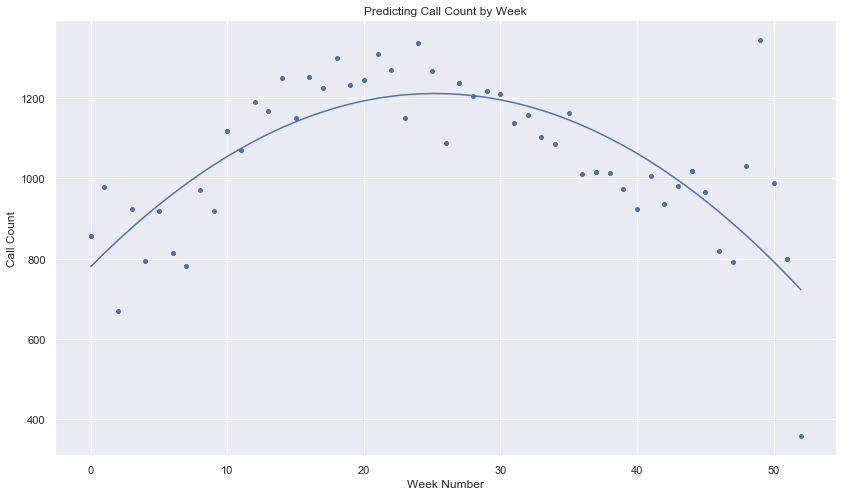

In [96]:
sns.scatterplot(x='Week Number',y='Call Count',data=grouped_df)
sns.lineplot(x='Week Number', y='predictions', data=grouped_df)
plt.ylabel('Call Count')
plt.title('Predicting Call Count by Week');